In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
df = pd.read_csv('C:/Users/prana/Downloads/Social_Network_Ads.csv')

In [243]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [244]:
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [246]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [247]:
for i in range(len(df['Gender'])):
    if df['Gender'].iloc[i] == 'Male' : 
        df['Gender'].iloc[i] = 1
    elif df['Gender'].iloc[i] == 'Female' : 
            df['Gender'].iloc[i] = 0

C:\Program Files (x86)\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [248]:
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
5,15728773,1,27,58000,0
6,15598044,0,27,84000,0
7,15694829,0,32,150000,1
8,15600575,1,25,33000,0
9,15727311,0,35,65000,0


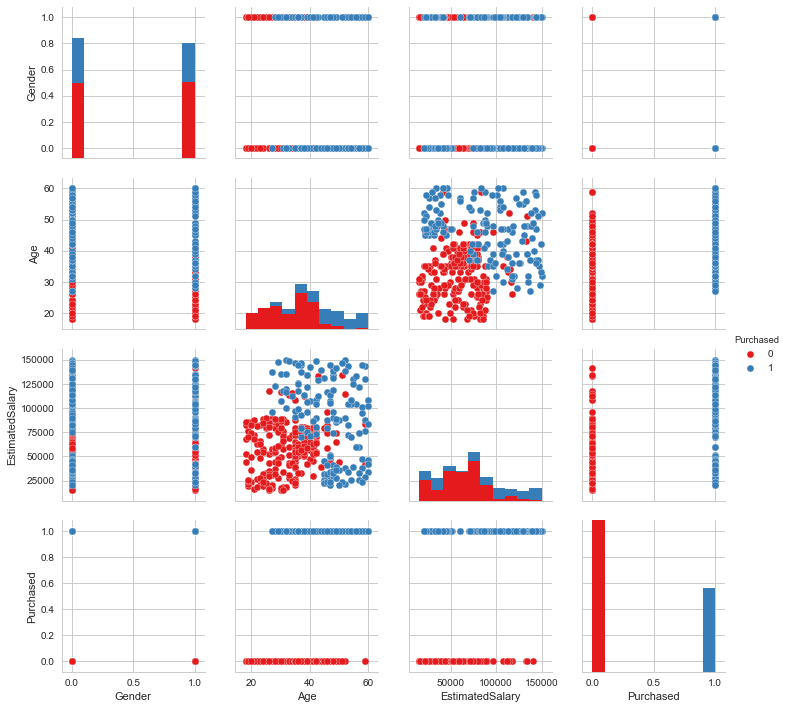

In [249]:
sns.pairplot(df.drop('User ID', axis=1), hue='Purchased',palette='Set1')

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


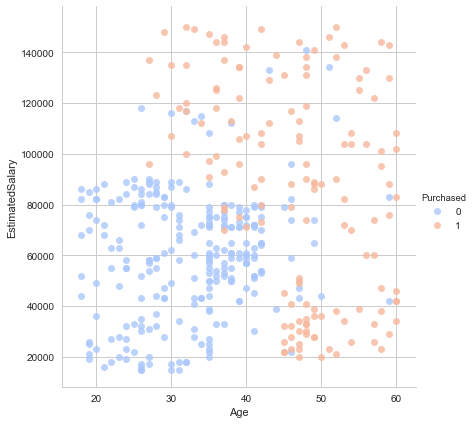

In [251]:
sns.set_style('whitegrid')
sns.lmplot('Age','EstimatedSalary',data= df, hue='Purchased',palette='coolwarm',size=6,aspect=1,fit_reg=False)

# Train Test Split

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
#Spliting the dataset in independent and dependent variables
X = df.iloc[:,1:4].values
y = df['Purchased'].values


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


# Train the Support Vector Classifier

In [255]:
from sklearn.svm import SVC

In [256]:
model = SVC()

In [257]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predictions and Evaluations

In [258]:
predictions = model.predict(X_test)

In [259]:
from sklearn.metrics import classification_report,confusion_matrix

In [260]:
print(confusion_matrix(y_test,predictions))

[[64  4]
 [ 3 29]]


In [261]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



In [262]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [263]:
from sklearn.model_selection import GridSearchCV

In [264]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [265]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.870000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.810000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.850000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.790000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.750000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.880000, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .... C=0.1,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .... C=100, gamma=0.01, kernel=rbf, score=0.940000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ... C=100, gamma=0.001, kernel=rbf, score=0.790000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ... C=100, gamma=0.001, kernel=rbf, score=0.760000, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ... C=100, gamma=0.001, kernel=rbf, score=0.910000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .. C=100, gamma=0.0001, kernel=rbf, score=0.750000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .. C=100, gamma=0.0001, kernel=rbf, score=0.740000, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .. C=100, gamma=0.0001, kernel=rbf, score=0.880000, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [266]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [267]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

*** Rerunning the predictions ***

In [268]:
grid_predictions = grid.predict(X_test)

In [269]:
print(confusion_matrix(y_test,grid_predictions))

[[64  4]
 [ 3 29]]


In [270]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



In [272]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

[0.96, 0.94, 0.95]
[0.88, 0.91, 0.89]


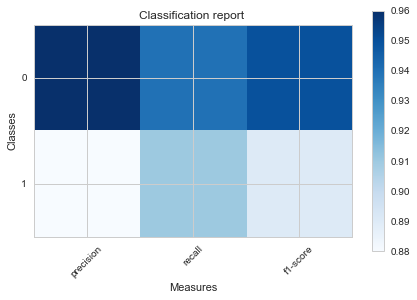

In [273]:
plot_classification_report(classification_report(y_test,grid_predictions))